# Playground

In [1]:
import pandas as pd

# import data from csv
path = 'data/payby_data_202401232353.csv'
data = pd.read_csv(path)

# print the attributes of the data
print('Attributes: ', list(data.columns))

# print the total number of records in the data
print("Total number of records in the file: ", data.shape[0])
print('-----------------------------------')

# print one record
print("One record: ", data.iloc[0])
# print the items of the first record
print("Items of the first record: ", data.iloc[0]['items'])
print('-----------------------------------')

# print the total amount of money spent
BRL_to_USD = 0.20
print("Total amount of money spent: R$", data['payment_R$'].sum())
print("Total amount of money spent: US$", data['payment_R$'].sum() * BRL_to_USD)

# print the number of unique stores
print("Number of unique stores: ", data['store_id'].nunique())

Attributes:  ['ts_created', 'items', 'store_id', 'payment_R$', 'type', 'store_type']
Total number of records in the file:  3527
-----------------------------------
One record:  ts_created                        2022-09-05 16:15:57.364 -0300
items         [{"name": "ALMOCO KG", "extra": [], "value": "...
store_id                                                      6
payment_R$                                                   30
type                                                          t
store_type                                              Comanda
Name: 0, dtype: object
Items of the first record:  [{"name": "ALMOCO KG", "extra": [], "value": "2250", "amount": 1}, {"name": "REFRI LITRO", "extra": [], "value": "800", "amount": 1.0}]
-----------------------------------
Total amount of money spent: R$ 158555
Total amount of money spent: US$ 31711.0
Number of unique stores:  4


# Simple analysis

Total amount of money spent per store: 
store_id
6     70548
10    69158
12     7811
15    11038
Name: payment_R$, dtype: int64
-----------------------------------
Top 3 items for store  6 :  [('LUNCH KG', 6340497.0), ('LITER REFRI', 190400.0), ('EISENBAHN BEER BOTTLE', 187000.0)]
-----------------------------------


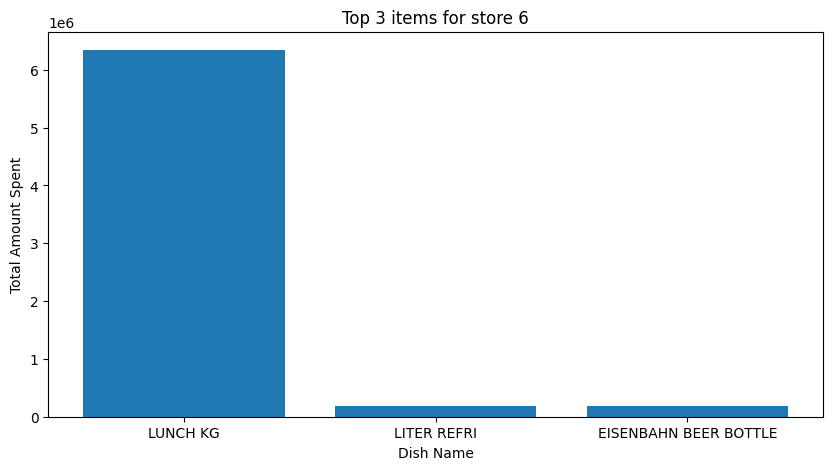

Top 3 items for store  10 :  [('BUFFET WITH DISCOUNT', 2047622.9900000147), ('BUFFET', 584722.4799999989), ('SUKITA 350ML', 79200.0)]
-----------------------------------


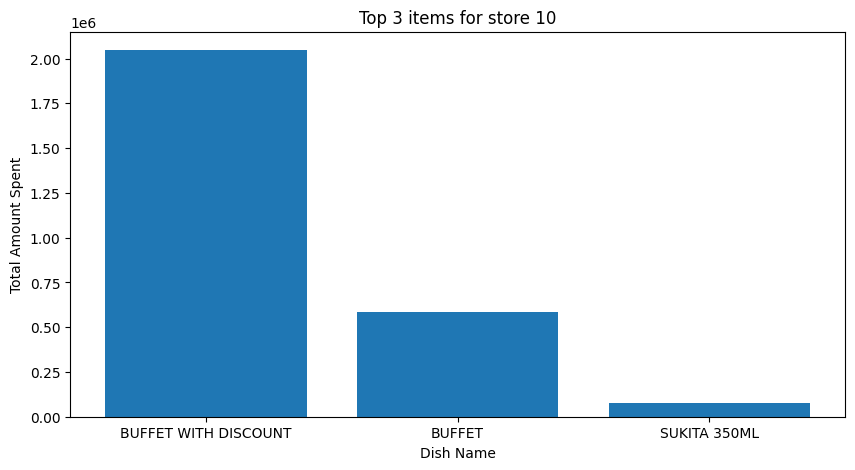

Top 3 items for store  12 :  [('FAMILY PIZZA', 102405.0), ('MEDIUM PIZZA', 66980.0), ('CUP OF WHITE OR RED WINE', 57250.0)]
-----------------------------------


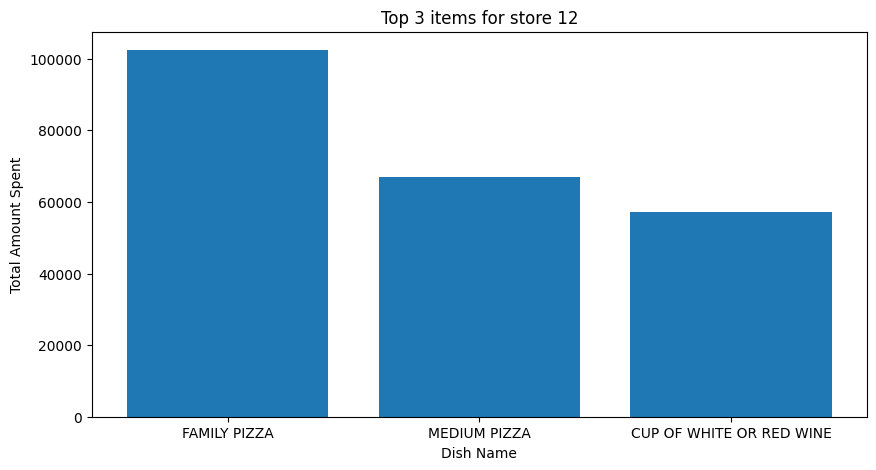

Top 3 items for store  15 :  [('PIZZA RODIZIO', 778440.0), ('FILE MIGNON PARMEGIANA 1P', 75480.0), ('FILE MIGNON PARMEGIANA 2P', 72474.0)]
-----------------------------------


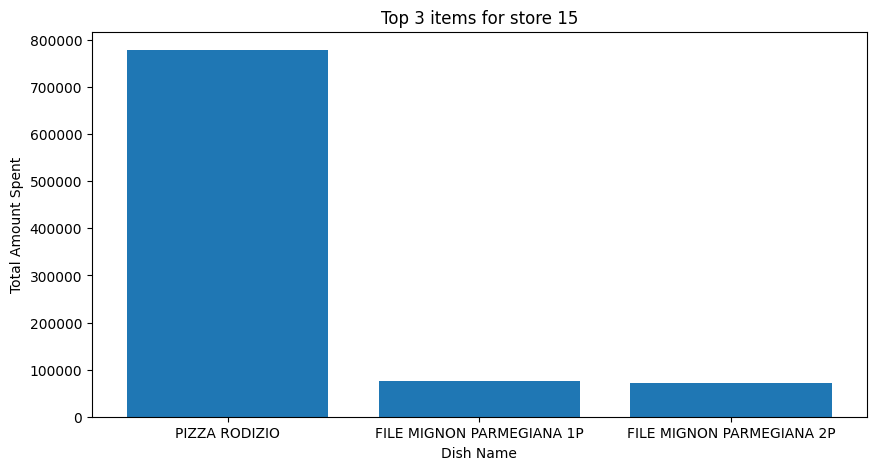

In [22]:
import matplotlib.pyplot as plt
import ast
# for item_info store, print the total amount of money spent
print("Total amount of money spent per store: ")
print(data.groupby('store_id')['payment_R$'].sum())
print('-----------------------------------')

def get_translation():
    # read the dish names from the file
    dish_names = []
    with open('data/dish_name_Brazilian.txt', 'r') as f:
        dish_name_BR = f.read().split('\n')
        for each in dish_name_BR:
            dish_names.append(each)

    # read the dish names translation from the file
    translate_dict = {}
    with open('data/dish_name_English.txt', 'r') as f:
        dish_name_ENG = f.read().split('\n')
        if len(dish_name_ENG) == len(dish_names):   
            index = 0
            for each in dish_names:
                translate_dict[each] = dish_name_ENG[index]
                index += 1
    return translate_dict


def get_top_3_items(store_id, dish_name_collection):
    # get the items of the store
    items = data[data['store_id'] == store_id]
    
    # convert the items to a dictionary
    # ignore the first '[' and the last ']'
    # it is formatted like {,,}, {,,}, {,,}, ...
    # convert the string to a dictionary
    d = {}
    for item_info in items['items']:
        item_info = item_info[1:-1]

        # split the string by '},'
        item_info = item_info.split('}, ')

        # for item_info item except for the last one, add a '}' at the end
        for i in range(len(item_info) - 1):
            item_info[i] = item_info[i] + '}'

        # convert the string to a dictionary
        for i in range(len(item_info)):
            parsed_dict = ast.literal_eval(item_info[i])
            dish_name = parsed_dict['name']
            subtotal = float(parsed_dict['value']) * float(parsed_dict['amount'])
            if dish_name in d:
                d[dish_name] += subtotal
            else:
                d[dish_name] = subtotal
            dish_name_collection.add(dish_name)

    # sort the dictionary by value
    sorted_d = sorted(d.items(), key=lambda x: x[1], reverse=True)
    top_3 = sorted_d[:3]

    # translate the dish names
    for i in range(3):
        if top_3[i][0] in translate_dict:
            top_3[i] = (translate_dict[top_3[i][0]], top_3[i][1])

    print("Top 3 items for store ", store_id, ": ", top_3)
    print('-----------------------------------')

    # plot the top 3 items
    plt.figure(figsize=(10, 5))
    plt.xlabel('Dish Name')
    plt.ylabel('Total Amount Spent (R$)')
    plt.title('Top 3 items for store ' + str(store_id))
    plt.bar([x[0] for x in top_3], [x[1] for x in top_3])
    plt.show()

def all_stores(UPDATE=False):
    dish_name_collection = set()
    for store_id in data['store_id'].unique():
        get_top_3_items(store_id, dish_name_collection)

    # write the dish names to a file
    # change the value of UPDATE to True to update the file
    if UPDATE: 
        path = 'data/dish_name_Brazilian.txt'
        with open(path, 'w') as f:
            for each in dish_name_collection:
                f.write(each + '\n')
    return dish_name_collection

translate_dict = get_translation()
dish_name_collection = all_stores()

